# ResNet 

논문 

 - https://arxiv.org/pdf/1512.03385.pdf
 - https://arxiv.org/pdf/1603.05027.pdf
 
 

ResNet은 2015년 ILSVRC 대회에서 우승한 모델이다. top-5 error 가 겨우 3.6%로 사람의 분류 수준인 5% 내외를 뛰어 넘었다.

#### Degradation 문제 

이전의 연구들로 모델의 깊이가 그 성능에 큰 영향을 미친다는 것을 알 수 있다. 그저 네트워크를 깊게 만들면, gradient vanishing/exploding 문제 때문에 학습이 잘 이루어지지 않고, 비용함수 값이 수렴하지 않는다. 다행히, 이에 대한 해결책으로 정규화 레이어 추가, 가중치 초기화 방법 등이 소개 되었고 꽤 깊은 모델이라도 학습을 수렴시킬 수 있게 되었다. 하지만 학습이 수렴했다 하더라도 모델의 깊이가 깊어지다 보면 어느 순간 더 얕은 모델의 성능보다 더 나빠지는 현상이 발생한다. 이를 Degradation 문제라고 한다. 이는 과적합 문제와는 다르다. 과적합 문제는 테스트 성능에 대한 문제이지만, Degradation은 훈련용 데이터에 대한 성능의 문제이다. ResNet의 저자들은 이 Degradation 문제를 해결하기 위한 구조를 제시했다. 

#### Skip connection 

기존의 뉴럴넷의 학습 목적이 입력($x$)을 타겟값($y$)으로 맵핑하는 함수 $H(x)$ 를 찾는 것이라고 한다면, 뉴럴넷은 $H(x) - y$를 최소화 하는 방향으로 학습을 진행한다. 이 때 $x$와 짝지어진 $y$는 사실 $x$를 대변하는 것으로, 특히 이미지 분류 문제에서는 네트워크의 입 출력을 의미상 같게끔 맵핑해야한다. 그래서 ResNet에서는 관점을 바꿔 네트워크가 $H(x) - x$를 얻는 것으로 목표를 수정하였다. 입력과 출력의 잔차를 $F(x) = H(x) - x$라고 정의를 하고 네트워크는 이 $F(x)$를 찾는 것이다. 이 $F(x)$는 잔차라고 할 수 있고, 이렇게 잔차를 학습하는 것을 Residual learning, Residual mapping이라고 한다. 결과적으로 출력 $H(x) = F(x) + x$가 된다. 이렇게 네트워크의 입력과 출력이 더해진 것을 다음 레이러의 입력으로 사용하는 것을 스킵연결(skip connection) 이라고 한다. 기존의 뉴럴넷은 $H(x)$가 어떻게든 정답과 같게 만드는 것이 목적이었다면, 이제 입력과 출력 사이의 잔차를 학습하는 것, 즉 최적의 경우 $F(x)=0$이 되어야하므로 학습의 목표가 이미 정해져 있기 때문에 학습 속도가 빨라질 것이고, 네트워크가 잔차를 학습하고 나면, 입력값의 작은 변화에도 민감하게 반응 할 것이다라는 것이 ResNet의 가설이다.

<img src="https://datascienceschool.net/upfiles/6182312059774a81a2a26246bd4e83f2.png"  style="width: 100%;">

그림 18.4.6 : 스킵연결

스킵 연결을 구현 하는 것은 덧셈 연산의 추가 만으로 가능하다. 이는 추가적인 연산량이나 파라미터가 많이 필요하지 않다. 또한 역전파 시에 그레디언트가 잘 흘러갈 수 있게 해준다는 장점도 있다. 

### ResNet의 구조

ResNet의 구조는 Residual Block과 Identity Block으로 이루어져있다. 이 또한 같은 연산이지만, Identity Block에서는 입력값과 출력값의 크기를 맞추어주는 작업이 필요할 뿐이다. 다음 그림을 보고 자세히 알아보도록 하자. 다음 그림은 Residual Block과 Identity Block 그리고 ResNet50의 구조를 간략히 표현 한 것이다. ResNet50이란 컨볼루션(convolution) 연산과 fully connected layer만 계산 했을 때, 총 레이어 갯수가 50개가되는 ResNet 모델을 뜻한다. 

#### Residual Block / Identity Block

<img src="https://datascienceschool.net/upfiles/2e104ff279804e839cef46fc58ef16e7.png"  style="width: 100%;">

그림 18.4.7 : Residual Block(왼쪽), Identity Block(오른쪽)

#### ResNet50

|  유형  |입력 크기 | 출력 크기 | 커널 크기 | 횟수 |
|:--|:------:|:-------:|:------------:|:-------:|
|**입력**|(224,224,3)| |||
|**Conv**|(224,224,3)|(112,112,64)|(7,7)||
|**maxpool**|(112,112,64)|(55,55,64)|(3,3)||
|**Residual Block**|(55,55,64)|(55,55,256)|$\begin{bmatrix} 1\times1,64 \\ 3\times3,64 \\ 1\times1,256 \end{bmatrix}\;\;$ |$\times 3$|
|**Identity Block**|(55,55,256)|(28,28,512)|$\begin{bmatrix} 1\times1,128 \\ 3\times3,128 \\ 1\times1,512 \end{bmatrix}\;\;$||
|**Residual Block**|(28,28,512)|(28,28,512)|$\begin{bmatrix} 1\times1,128 \\ 3\times3,128 \\ 1\times1,512  \end{bmatrix}\;\;$|$\times 3$|
|**Identity Block**|(28,28,512)|(14,14,1024)|$\begin{bmatrix} 1\times1,256 \\ 3\times3,256 \\ 1\times1,1024 \end{bmatrix}\;\;$|
|**Residual Block**|(14,14,1024)|(14,14,1024)|$\begin{bmatrix} 1\times1,256 \\ 3\times3,256 \\ 1\times1,1024 \end{bmatrix}\;\;$|$\times 5$|
|**Identity Block**|(14,14,1024)|(7,7,2048)|$\begin{bmatrix} 1\times1,512 \\ 3\times3,512 \\ 1\times1,2048 \end{bmatrix}\;\;$|
|**Residual Block**|(7,7,2048)|(7,7,2048)|$\begin{bmatrix} 1\times1,512 \\ 3\times3,512 \\ 1\times1,2048 \end{bmatrix}\;\;$|$\times 2$|
|**Average pool**|(7,7,2048)|(1,1,2048)|(7,7)|1|
|**FCN**|(1,1,2048|(1,1,1000)|||
|**softmax**|(1,1,1000)|(1,1,1000)|||

표 18.4.5 : ResNet50 구조

ResNet에서는  첫번째 레이어(7x7 컨볼루션)를 제외하고는 모든 컨볼루션 연산에 3x3 이하 크기의 커널이 사용되었고, 피쳐맵의 크기가 같은 레이어는 출력 피쳐맵 갯수가 동일하다. 그리고 피쳐맵의 크기가 반으로 작아지는 경우 출력 피쳐맵의 갯수가 2배가 된다. pooling은 거의 사용되지 않고 컨볼루션 연산의 스트라이드(stride)를 2로 하여 피쳐맵의 크기를 줄였다. 이미지가 반으로 작아진 경우, Identity Block이 사용되며, 입력값을 바로 더하지 않고, 1x1 컨볼루션 연산을 스트라이드 2로 설정하여 피쳐맵의 크기와 갯수를 맞추어준 다음 더해준다. 이를 프로젝션 숏컷(projection shortcut)이라고도 한다. 

#### 병목 레이어 

ResNet50 부터는 연산량의 줄이기 위해 Residual Block 내에, 1x1, 3x3, 1x1 컨볼루션 연산을 쌓았다. Inception에서 배웠던 것과 같은 개념이다. 1x1 컨볼루션 연산으로 피쳐맵의 갯수를 줄였다가 3x3을 거친 후, 1x1 컨볼루션 연산으로 차원을 늘려준다. 이 과정이 병목 같다 하여 병목레이어(bottleneck layer)라고 부른다. 

#### Pre-activation Residual Unit

ResNet 저자들은 후속 논문에서 더 개선된 skip connection 방법을 제시했다. 기존의 skip connection은 출력과 입력이 더해진 후 활성화 함수(ReLu)를 통과하였다. 활성화 함수를 $f(\cdot)$이라고 하고, 수식으로 표현하면 $H(x) = f(F(x) + x)$ 가 된다. 뒤에 따라오는 비선형 활성화 함수 때문에 다음 레이어의 입력 값에 이전 레이어의 입력이 그대로 반영되지는 않는다. 하나의 Residual Block 만 생각하면 큰 차이가 없겠지만, 이를 여러 개를 연결 하면 차이가 발생할 수도 있다. 그래서, $F(x)$ 안에 활성화함수를 반영한 다음 $F(x)$와 입력값을 더해준다. 수식으로 표현 하면, $H(x) = F(x) + x$이다. 이를 그림으로 나타내면 다음과 같다. 

<img src="https://datascienceschool.net/upfiles/226eda2a7b564542bd06d57b5510baa1.png"  style="width: 100%;">

그림 18.4.8 : 기존의 스킵연결(왼쪽), 개선된 스킵연결(오른쪽)

이렇게 바꾸면, $l+1$번째의 레이어의 입력값 $x_{l+1} = x_{l} + F(x_l)$ 로 나타낼 수 있어 수식이 기존 보다 더 간단해 진다. 이를 더 연결해 보면, 다음과 같다. 
$$x_{l+1} = x_l + F(x_l) = x_{l-1} + F(x_{l-1}) + F(x_l) \cdots = x_0 + \displaystyle\sum_{i=1}^{l}F(x_i)$$
각 레이어간의 관계가 더하기로 표현 되기 때문에 수학적으로 좀 더 유용하다. 그리고 실제로 논문에서의 실험결과를 확인하면 개선된 구조를 사용했을 때, 더 나은 결과를 가져온다. Keras에서 제공하는  ResNet50에는 이 구조가 적용되어 있다. 

### Keras 의 ResNet50

In [1]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)  # warning 출력 방지
from keras.applications.resnet50 import ResNet50, decode_predictions
resnet = ResNet50()
resnet.summary()

Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

테스트 시 소요 시간 : 0.5910253524780273
brambling (44.66%)


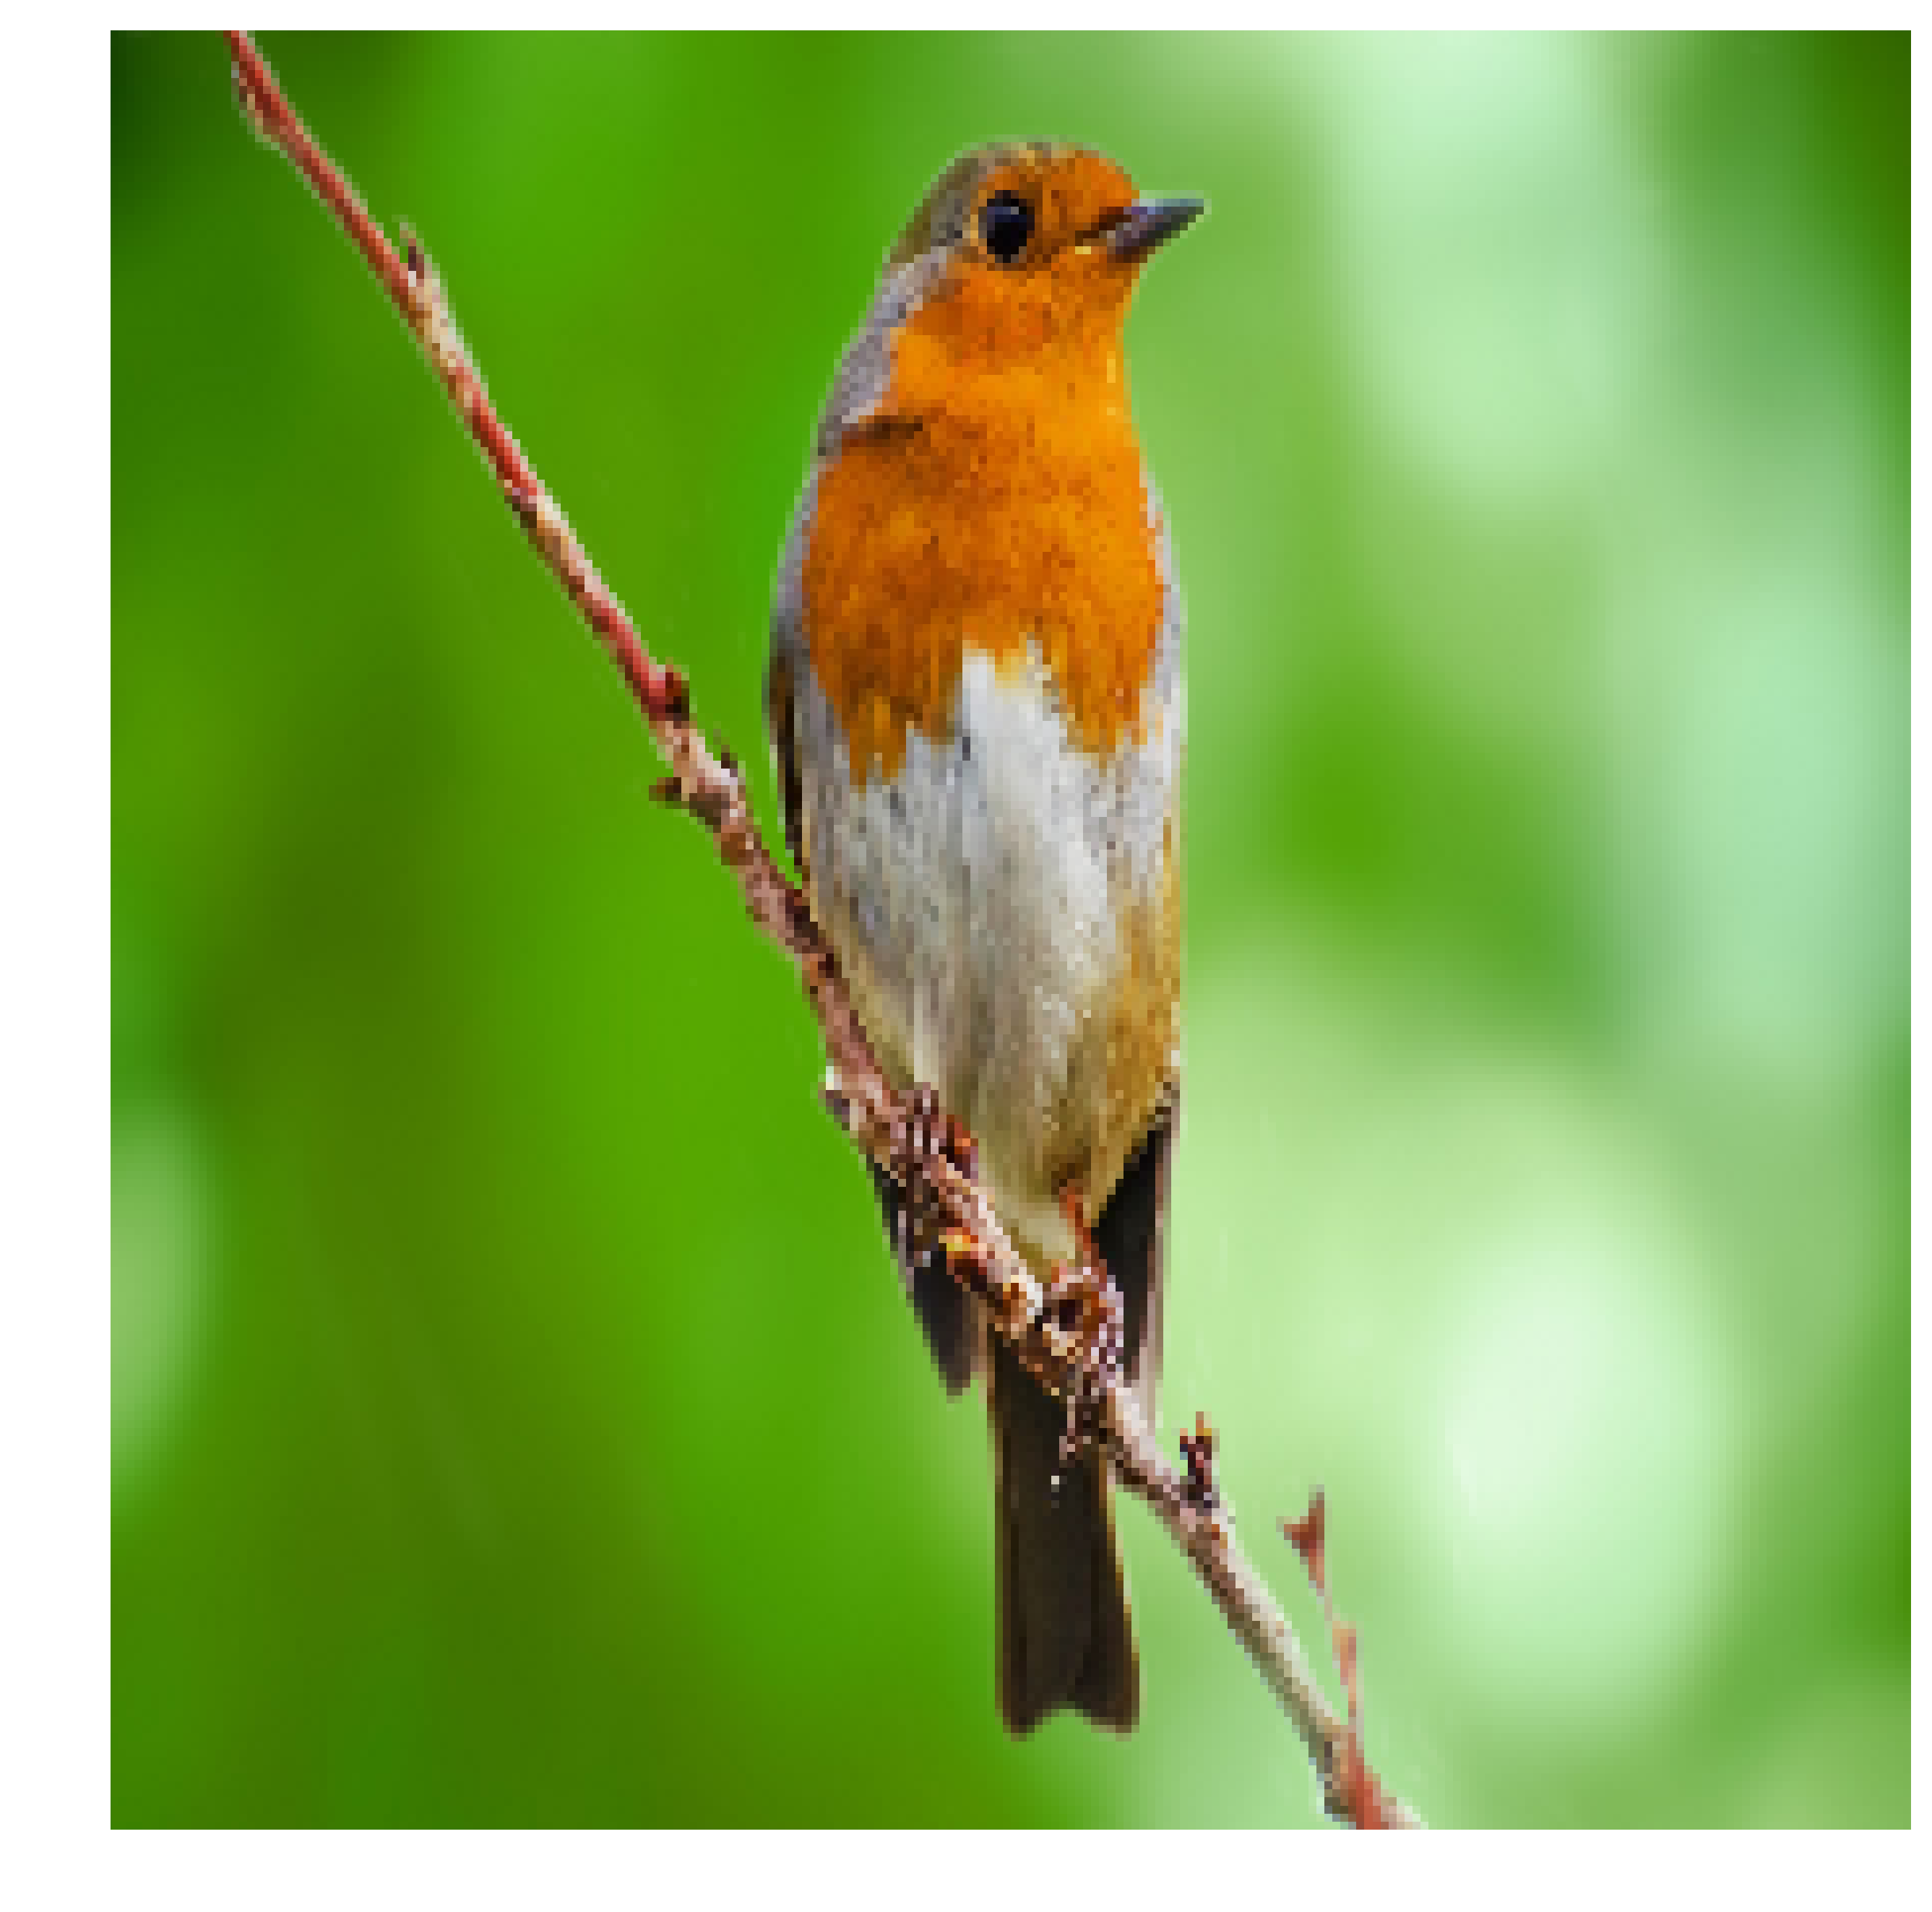

In [2]:
import cv2
import time 

img = cv2.imread('bird1.jpg', -1)
img = cv2.resize(img, (224, 224))

start = time.time() 
yhat = resnet.predict(img.reshape(-1, 224, 224, 3))
time = time.time() - start
label = decode_predictions(yhat)
label = label[0][0]

print("테스트 시 소요 시간 : {}".format(time))
print('%s (%.2f%%)' % (label[1], label[2]*100))
img = img[:,:,::-1]
plt.figure(figsize=(11,11))
plt.imshow(img)
plt.axis("off")
plt.show()